In [2]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
from sklearn.preprocessing import OneHotEncoder
from IPython.display import Image  
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [3]:
def display_scores(true, preds, model_name):
    rec = recall_score(true, preds, average='micro')
    acc = accuracy_score(true, preds)
    f1 = f1_score(true, preds, average='micro', zero_division=0)
    prec = precision_score(true, preds, average='micro', zero_division=0)
    rc = classification_report(true , preds)
    cm = confusion_matrix(true, preds)
    
    print("Model: {}".format(model_name))
    print("Recall: {}".format(rec))
    print("Accuracy: {}".format(acc))
    print("F1-Score: {}".format(f1))
    print("Precision: {}".format(prec))
    print("Classification Report:\n {}".format(rc))
    print("Confusion Matrix:\n {}".format(cm))
    print("--------------------------------------------------------------------------------")
    

    return display_scores


In [4]:
df = pd.read_csv('asp_df.csv', index_col=0)
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [5]:
df.longitude.min()

0.0

In [6]:
out = df.longitude != 0
data = df[out]

In [7]:
data.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [8]:
data.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')

In [9]:
X = data.loc[:,['lga','quantity_group','extraction_type_class','source_type','waterpoint_type']]
y = data.loc[:,'status_group']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .3, random_state = 42)

ohe = OneHotEncoder()
ohe.fit(X_train)
X_train_ohe = ohe.transform(X_train).toarray()

dtc = DecisionTreeClassifier(criterion='entropy',max_depth=5)
dtc.fit(X_train_ohe, y_train)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

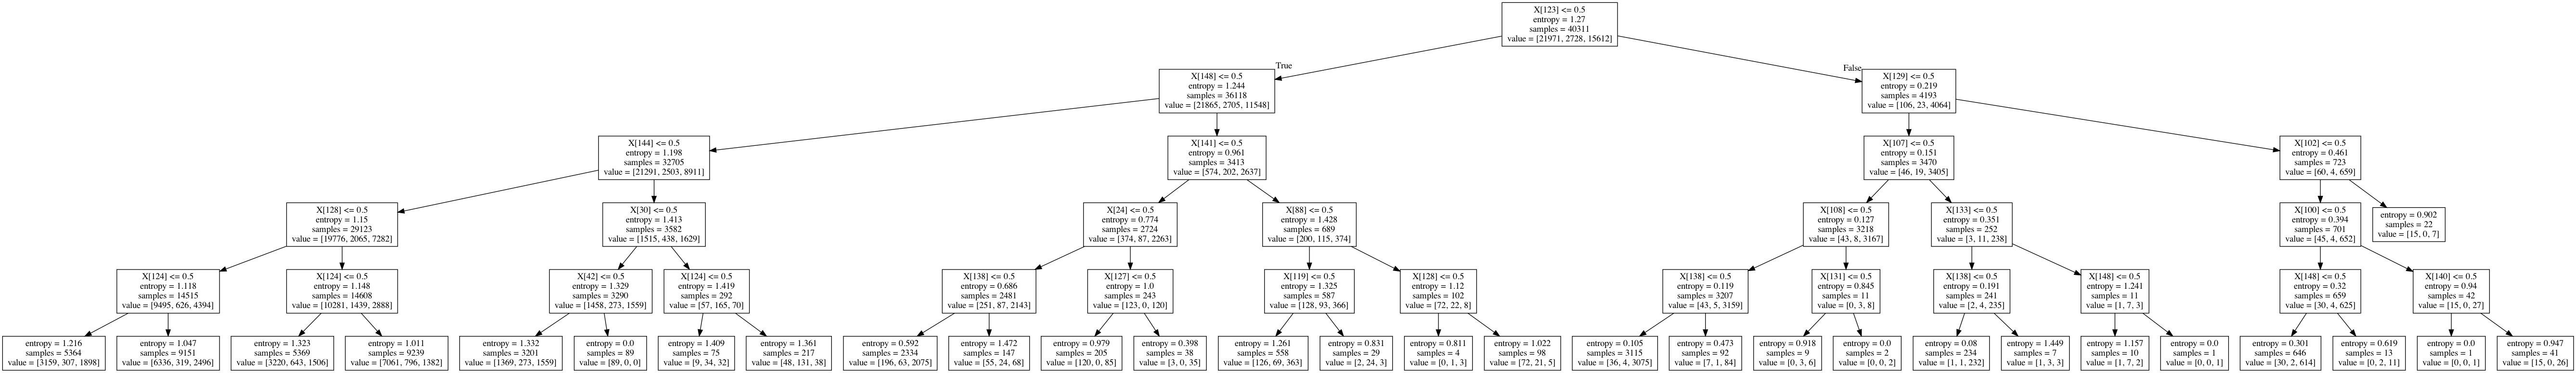

In [10]:
dot_data = export_graphviz(dtc, out_file=None)
graph = graph_from_dot_data(dot_data)
Image(graph.create_png())

In [11]:
from sklearn.ensemble import RandomForestClassifier
rclf = RandomForestClassifier(n_estimators = 25)

In [12]:
X = data.loc[:,['lga','quantity_group','extraction_type_class','source_type','waterpoint_type']]
y = data.loc[:,'status_group']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .3, random_state = 42)

ohe = OneHotEncoder()
ohe.fit(X_train)
X_train_ohe = ohe.transform(X_train).toarray()

rclf.fit(X_train_ohe, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=25,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [13]:
from sklearn.metrics import confusion_matrix, classification_report
pred = rclf.predict(X_train_ohe)

print(confusion_matrix(y_train, pred))
print(classification_report(y_train, pred))


[[20180   230  1561]
 [ 1675   637   416]
 [ 4616   202 10794]]
                         precision    recall  f1-score   support

             functional       0.76      0.92      0.83     21971
functional needs repair       0.60      0.23      0.34      2728
         non functional       0.85      0.69      0.76     15612

               accuracy                           0.78     40311
              macro avg       0.73      0.61      0.64     40311
           weighted avg       0.78      0.78      0.77     40311



In [14]:
rclf2 = RandomForestClassifier(n_estimators = 25)
X = data.loc[:,['lga','quantity_group','quality_group','extraction_type','source_type','waterpoint_type']]
y = data.loc[:,'status_group']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .3, random_state = 42)

ohe = OneHotEncoder()
ohe.fit(X_train)
X_train_ohe = ohe.transform(X_train).toarray()

rclf2.fit(X_train_ohe, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=25,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [15]:
from sklearn.metrics import confusion_matrix, classification_report
pred = rclf2.predict(X_train_ohe)

print(confusion_matrix(y_train, pred))
print(classification_report(y_train, pred))

[[20154   231  1586]
 [ 1603   670   455]
 [ 4080   170 11362]]
                         precision    recall  f1-score   support

             functional       0.78      0.92      0.84     21971
functional needs repair       0.63      0.25      0.35      2728
         non functional       0.85      0.73      0.78     15612

               accuracy                           0.80     40311
              macro avg       0.75      0.63      0.66     40311
           weighted avg       0.80      0.80      0.79     40311



In [16]:
rclf3 = RandomForestClassifier(n_estimators = 25)
X = data.loc[:,['lga','quantity_group','quality_group','management_group','extraction_type','source_type','waterpoint_type']]
y = data.loc[:,'status_group']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .3, random_state = 42)

ohe = OneHotEncoder()
ohe.fit(X_train)
X_train_ohe = ohe.transform(X_train).toarray()

rclf3.fit(X_train_ohe, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=25,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [17]:
from sklearn.metrics import confusion_matrix, classification_report
pred = rclf3.predict(X_train_ohe)

print(confusion_matrix(y_train, pred))
print(classification_report(y_train, pred))

[[20125   248  1598]
 [ 1552   774   402]
 [ 3793   223 11596]]
                         precision    recall  f1-score   support

             functional       0.79      0.92      0.85     21971
functional needs repair       0.62      0.28      0.39      2728
         non functional       0.85      0.74      0.79     15612

               accuracy                           0.81     40311
              macro avg       0.75      0.65      0.68     40311
           weighted avg       0.80      0.81      0.80     40311



In [18]:
rclf4 = RandomForestClassifier(n_estimators = 25)

X = data.loc[:,['lga','quantity_group','quality_group','management_group','extraction_type','source_class','waterpoint_type']]
y = data.loc[:,'status_group']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .3, random_state = 42)

ohe = OneHotEncoder()
ohe.fit(X_train)
X_train_ohe = ohe.transform(X_train).toarray()

rclf4.fit(X_train_ohe, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=25,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [19]:
pred = rclf4.predict(X_train_ohe)

print(confusion_matrix(y_train, pred))
print(classification_report(y_train, pred))

[[20070   248  1653]
 [ 1585   684   459]
 [ 3891   172 11549]]
                         precision    recall  f1-score   support

             functional       0.79      0.91      0.84     21971
functional needs repair       0.62      0.25      0.36      2728
         non functional       0.85      0.74      0.79     15612

               accuracy                           0.80     40311
              macro avg       0.75      0.63      0.66     40311
           weighted avg       0.80      0.80      0.79     40311



In [20]:
rclf5 = RandomForestClassifier(n_estimators = 25)

X = data.loc[:,['lga','quantity_group','quality_group','management_group','extraction_type','source_type','waterpoint_type_group']]
y = data.loc[:,'status_group']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .3, random_state = 42)

ohe = OneHotEncoder()
ohe.fit(X_train)
X_train_ohe = ohe.transform(X_train).toarray()

rclf5.fit(X_train_ohe, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=25,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [21]:
pred = rclf5.predict(X_train_ohe)

print(confusion_matrix(y_train, pred))
print(classification_report(y_train, pred))

[[19922   298  1751]
 [ 1566   717   445]
 [ 3847   184 11581]]
                         precision    recall  f1-score   support

             functional       0.79      0.91      0.84     21971
functional needs repair       0.60      0.26      0.37      2728
         non functional       0.84      0.74      0.79     15612

               accuracy                           0.80     40311
              macro avg       0.74      0.64      0.67     40311
           weighted avg       0.79      0.80      0.79     40311



In [22]:
rclf6 = RandomForestClassifier(n_estimators = 100)
X = data.loc[:,['lga','quantity_group','quality_group','management_group','extraction_type','source_type','waterpoint_type']]
y = data.loc[:,'status_group']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .3, random_state = 42)

ohe = OneHotEncoder()
ohe.fit(X_train)
X_train_ohe = ohe.transform(X_train).toarray()

rclf6.fit(X_train_ohe, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [23]:
pred = rclf6.predict(X_train_ohe)

print(confusion_matrix(y_train, pred))
print(classification_report(y_train, pred))

[[20143   230  1598]
 [ 1565   722   441]
 [ 3784   177 11651]]
                         precision    recall  f1-score   support

             functional       0.79      0.92      0.85     21971
functional needs repair       0.64      0.26      0.37      2728
         non functional       0.85      0.75      0.80     15612

               accuracy                           0.81     40311
              macro avg       0.76      0.64      0.67     40311
           weighted avg       0.80      0.81      0.80     40311



In [25]:
rclf6.feature_importances_


array([3.59197834e-03, 6.64621459e-04, 2.80427032e-03, 3.65369547e-03,
       1.80109959e-03, 2.32876867e-03, 2.23598993e-03, 3.06794495e-03,
       9.86197871e-04, 1.73010908e-03, 3.65701886e-03, 2.83732145e-03,
       2.19181952e-03, 7.21383426e-03, 2.96836304e-03, 2.53298717e-03,
       2.14526687e-03, 1.42205600e-03, 3.45288962e-03, 2.78859281e-03,
       2.21719196e-03, 1.25086278e-03, 2.76928727e-03, 3.04771539e-03,
       6.59836333e-03, 2.18943624e-03, 3.64248461e-03, 6.07400305e-03,
       2.23881288e-03, 7.87072364e-03, 7.76331655e-03, 5.66266878e-04,
       1.68570295e-03, 1.72586433e-03, 3.07138034e-03, 5.26806567e-03,
       2.68720802e-03, 9.75167284e-04, 3.45895404e-03, 3.48994130e-03,
       2.62845147e-03, 5.98347428e-03, 3.70601768e-03, 3.30355083e-03,
       3.30940207e-03, 4.14631281e-03, 3.34854163e-03, 2.68042019e-05,
       8.36987555e-04, 2.12646518e-03, 2.24782042e-03, 1.50088235e-03,
       1.38819053e-03, 4.46510707e-03, 3.50868400e-03, 4.54575116e-03,
      